# ECG Heartbeat Categorization
> By Ebby

The goal is to be able to classify heart disease from heartbeat signal. There is a lot of data, let's try to make sens out of it.

In [105]:
import numpy as np
import pandas as pd

import os
print(os.listdir("../input"))

mit_test_data = pd.read_csv("../input/mitbih_test.csv", header=None)
mit_train_data = pd.read_csv("../input/mitbih_train.csv", header=None)

print("MIT test dataset")
print(mit_test_data.info())
print("MIT train dataset")
print(mit_train_data.info())

['ptbdb_abnormal.csv', 'ptbdb_normal.csv', 'mitbih_train.csv', 'mitbih_test.csv']
MIT test dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB
None
MIT train dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB
None


In [82]:
mit_train_data[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

In [83]:
mit_train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
#mit_train_data.iloc[19999].plot()

## Random sample

For now let's take a random sample of the MIT train dataset.

In [ ]:
# take a random distribution
sample = mit_test_data.sample(25)

# remove the target column
sampleX = sample.iloc[:,sample.columns != 187]

import matplotlib.pyplot as plt

plt.style.use('classic')

# plt samples
for index, row in sampleX.iterrows():
    plt.plot(np.array(range(0, 187)) ,row)

plt.xlabel("time")
plt.ylabel("magnitude")
plt.title("heartbeat reccording \nrandom sample")

plt.show()

plt.style.use("ggplot")

plt.title("Number of record in each category")

plt.hist(sample.iloc[:,sample.columns == 187].transpose())
plt.show()

In [6]:
# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg' 

In [ ]:
mit_train_data.columns

In [ ]:
columns = [0,1,2,3,4,5,6,187]

In [ ]:
# `pairplot()` may become very slow with the SVG format
#%config InlineBackend.figure_format = 'png'
#sns.pairplot(mit_train_data[columns]);

# How many date we have in each category?

In [84]:
print("Train data")
print("Type\tCount")
print((mit_train_data[187]).value_counts())
print("-------------------------")
print("Test data")
print("Type\tCount")
print((mit_test_data[187]).value_counts())

Train data
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
-------------------------
Test data
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


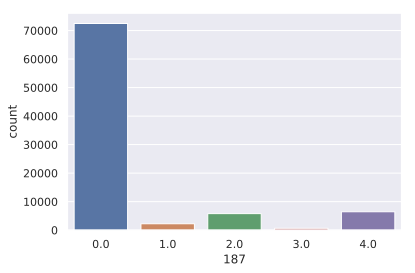

In [7]:
sns.countplot(x=187, data=mit_train_data);

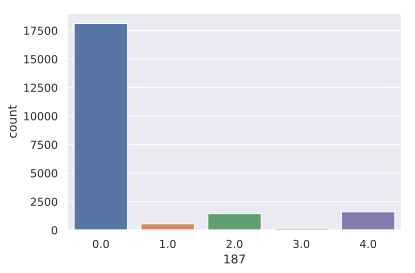

In [8]:
sns.countplot(x=187, data=mit_test_data);

# Separate features and targets

In [9]:
mit_train_data = mit_train_data.sample(frac=1)

In [10]:
from keras.utils import to_categorical

print("--- X ---")
X = mit_train_data.loc[:, mit_train_data.columns != 187]
print(X.head())
print(X.info())

print("--- Y ---")
y = mit_train_data.loc[:, mit_train_data.columns == 187]
y = to_categorical(y)

print("--- testX ---")
testX = mit_test_data.loc[:, mit_test_data.columns != 187]
print(testX.head())
print(testX.info())

print("--- testy ---")
testy = mit_test_data.loc[:, mit_test_data.columns == 187]
testy = to_categorical(testy)

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

--- X ---
            0         1         2         3         4         5         6    \
71984  0.986425  0.755656  0.113122  0.040724  0.167421  0.122172  0.067873   
33967  0.982079  0.802867  0.123656  0.003584  0.213262  0.204301  0.200717   
68394  1.000000  0.899135  0.564842  0.005764  0.089337  0.227666  0.314121   
78195  1.000000  0.925750  0.704581  0.398104  0.230648  0.118483  0.067930   
6692   1.000000  0.632911  0.158228  0.164557  0.111814  0.012658  0.023207   

            7         8         9   ...   177  178  179  180  181  182  183  \
71984  0.072398  0.072398  0.072398 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
33967  0.224014  0.200717  0.195340 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
68394  0.340058  0.345821  0.342939 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
78195  0.064771  0.056872  0.037915 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6692   0.116034  0.206751  0.265823 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       184  185  186  
71984  0.0  0.0  

# Keras model to make prediction

In [60]:
from keras import backend as K
    
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.
        Only computes a batch-wise average of recall.
        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall
 
    def precision(y_true, y_pred):
        """Precision metric.
        Only computes a batch-wise average of precision.
        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 训练一个Base Model 确定BaseLine

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation,BatchNormalization,Dropout

model = Sequential()

model.add(Dense(50, input_dim=187, init='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, init='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc',f1])

history = model.fit(X, y, validation_split=0.2,epochs=100,shuffle=True,class_weight='auto')

In [ ]:
print("Evaluation: ")
mse, acc, F1 = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)
print('F1:', F1)

This seems to work pretty well!

Work in progress

In [ ]:
history.history.keys()

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.legend(labels=['loss','val_loss','f1','val_f1'],loc='best')
plt.show()

# 使用CNN进一步优化

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X = np.expand_dims(X,2)
testX = np.expand_dims(testX,2)

In [ ]:
X.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Input, Flatten, SeparableConv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model

from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [ ]:
n_obs, feature, depth = X.shape
batch_size = 1024

In [ ]:
def build_model():
    input_img = Input(shape=(feature, depth), name='ImageInput')
    x = Conv1D(64, 3, activation='relu', padding='same', name='Conv1_1')(input_img)
    x = Conv1D(64, 3, activation='relu', padding='same', name='Conv1_2')(x)
    x = MaxPooling1D(2, name='pool1')(x)
    
    x = SeparableConv1D(64, 3, activation='relu', padding='same', name='Conv2_1')(x)
    x = SeparableConv1D(64, 3, activation='relu', padding='same', name='Conv2_2')(x)
    x = MaxPooling1D(2, name='pool2')(x)
    
    x = SeparableConv1D(128, 3, activation='relu', padding='same', name='Conv3_1')(x)
    x = BatchNormalization(name='bn1')(x)
    x = SeparableConv1D(128, 3, activation='relu', padding='same', name='Conv3_2')(x)
    x = BatchNormalization(name='bn2')(x)
    
    x = SeparableConv1D(256, 3, activation='relu', padding='same', name='Conv3_3')(x)
    x = MaxPooling1D(2, name='pool3')(x)
    x = Dropout(0.6, name='dropout0')(x)
    
    x = Flatten(name='flatten')(x)
    x = Dense(256, activation='relu', name='fc1')(x)
    x = Dropout(0.6, name='dropout1')(x)
    x = Dense(128, activation='relu', name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)
    x = Dense(5, activation='softmax', name='fc3')(x)
    
    model = Model(inputs=input_img, outputs=x)
    return model

In [ ]:
model =  build_model()
#model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc',f1])

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="/tmp/weights.hdf5", verbose=1, save_best_only=True)


In [ ]:
history = model.fit(X, y, validation_split=0.2,epochs=75,batch_size=batch_size,shuffle=True,class_weight='auto',callbacks=[checkpointer])

In [ ]:
print("Evaluation: ")
mse, acc, F1 = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)
print('F1:', F1)

In [ ]:
model.save('cnn-0.985.h5')

In [ ]:
y_pred = model.predict(testX, batch_size=1000)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

print(classification_report(testy.argmax(axis=1), y_pred.argmax(axis=1)))

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(testy.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],
                      title='Confusion matrix')
plt.show()

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 数据增强

In [ ]:
#mit_train_data = mit_train_data.sample(frac=1)

In [166]:
from keras.utils import to_categorical

print("--- X ---")
X = mit_train_data.loc[:, mit_train_data.columns != 187]
print(X.head())
print(X.info())

print("--- Y ---")
y = mit_train_data.loc[:, mit_train_data.columns == 187]
#y = to_categorical(y)

print("--- testX ---")
testX = mit_test_data.loc[:, mit_test_data.columns != 187]
print(testX.head())
print(testX.info())

print("--- testy ---")
testy = mit_test_data.loc[:, mit_test_data.columns == 187]
testy = to_categorical(testy)

--- X ---
        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9   ...   177  178  179  180  181  182  183  184  \
0  0.085784  0.058824  0.049020 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   185  186  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3 

In [167]:
X.shape,y.shape

((87554, 187), (87554, 1))

In [168]:
y = y.values.squeeze()

In [169]:
X = np.array(X)

In [170]:
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()

In [171]:
print(C0.shape[0],C1.shape[0],C2.shape[0],C3.shape[0],C4.shape[0])

72471 2223 5788 641 6431


> 放大C1 C3 类，C1类放大4倍，C3类放大8倍

In [172]:
import random
from scipy.signal import resample

def stretch(x):
    l = int(187 * (1 + (random.random()-0.5)/3))
    y = resample(x, l)
    if l < 187:
        y_ = np.zeros(shape=(187, ))
        y_[:l] = y
    else:
        y_ = y[:187]
    return y_

def amplify(x):
    alpha = (random.random()-0.5)
    factor = -alpha*x + (1+alpha)
    return x*factor

def augment(x):
    result = np.zeros(shape= (4, 187))
    for i in range(3):
        if random.random() < 0.33:
            new_y = stretch(x)
        elif random.random() < 0.66:
            new_y = amplify(x)
        else:
            new_y = stretch(x)
            new_y = amplify(new_y)
        result[i, :] = new_y
    return result

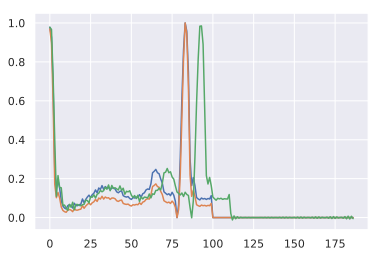

In [139]:
import matplotlib.pyplot as plt
import random
plt.plot(X[0, :])
plt.plot(amplify(X[0, :]))
plt.plot(stretch(X[0, :]))
plt.show()

In [173]:
# result_C1 = np.apply_along_axis(augment, axis=1, arr=X[C1]).reshape(-1, 187)
# class_C1 = np.ones(shape=(result_C1.shape[0],), dtype=int)*3

result_C3 = np.apply_along_axis(augment, axis=1, arr=X[C3]).reshape(-1, 187)
class_C3 = np.ones(shape=(result_C3.shape[0],), dtype=int)*3

# result_C32 = np.apply_along_axis(augment, axis=1, arr=X[C3]).reshape(-1, 187)
# class_C32 = np.ones(shape=(result_C32.shape[0],), dtype=int)*3

# X = np.vstack([X, result_C1, result_C3])
# y = np.hstack([y, class_C1, class_C3])

X = np.vstack([X,  result_C3])
y = np.hstack([y,  class_C3])

In [174]:
X.shape, y.shape

((90118, 187), (90118,))

In [175]:
y = to_categorical(y)

In [176]:
from sklearn.utils import shuffle
X, y = shuffle(X,y,random_state=0)

## Try a network by using augmented data

In [177]:
X = np.expand_dims(X,2)
testX = np.expand_dims(testX,2)

In [178]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Input, Flatten, SeparableConv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model

from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

n_obs, feature, depth = X.shape
batch_size = 1024

In [179]:
def build_model():
    input_img = Input(shape=(feature, depth), name='ImageInput')
    x = Conv1D(64, 3, activation='relu', padding='same', name='Conv1_1')(input_img)
    x = Conv1D(64, 3, activation='relu', padding='same', name='Conv1_2')(x)
    x = MaxPooling1D(2, name='pool1')(x)
    
    x = SeparableConv1D(128, 3, activation='relu', padding='same', name='Conv2_1')(x)
    x = SeparableConv1D(128, 3, activation='relu', padding='same', name='Conv2_2')(x)
    x = MaxPooling1D(2, name='pool2')(x)
    
    x = SeparableConv1D(256, 3, activation='relu', padding='same', name='Conv3_1')(x)
    x = BatchNormalization(name='bn1')(x)
    x = SeparableConv1D(256, 3, activation='relu', padding='same', name='Conv3_2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = Dropout(0.3, name='dropout3-2')(x)
    
    x = SeparableConv1D(512, 3, activation='relu', padding='same', name='Conv3_3')(x)
    x = MaxPooling1D(2, name='pool3')(x)
    x = Dropout(0.3, name='dropout3-3')(x)
    
    x = Flatten(name='flatten')(x)
    x = Dense(512, activation='relu', name='fc1')(x)
    x = Dropout(0.6, name='dropout1')(x)
    x = Dense(256, activation='relu', name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)
    x = Dense(5, activation='softmax', name='fc3')(x)
    
    model = Model(inputs=input_img, outputs=x)
    return model

In [180]:
model =  build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ImageInput (InputLayer)      (None, 187, 1)            0         
_________________________________________________________________
Conv1_1 (Conv1D)             (None, 187, 64)           256       
_________________________________________________________________
Conv1_2 (Conv1D)             (None, 187, 64)           12352     
_________________________________________________________________
pool1 (MaxPooling1D)         (None, 93, 64)            0         
_________________________________________________________________
Conv2_1 (SeparableConv1D)    (None, 93, 128)           8512      
_________________________________________________________________
Conv2_2 (SeparableConv1D)    (None, 93, 128)           16896     
_________________________________________________________________
pool2 (MaxPooling1D)         (None, 46, 128)           0         
__________

In [181]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc',f1])

In [182]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="/tmp/weights-aug.hdf5", monitor='val_f1', mode='max', verbose=1, save_best_only=True)

In [156]:
history = model.fit(X, y, validation_split=0.2,epochs=75,batch_size=batch_size*2,class_weight='auto',callbacks=[checkpointer])

Train on 79208 samples, validate on 19802 samples
Epoch 1/75
79208/79208 [==============================] - 12s 153us/step - loss: 1.0017 - acc: 0.7190 - f1: 0.6293 - val_loss: 0.9648 - val_acc: 0.7297 - val_f1: 0.7297

Epoch 00001: val_f1 improved from -inf to 0.72972, saving model to /tmp/weights-aug.hdf5
Epoch 2/75
79208/79208 [==============================] - 9s 111us/step - loss: 0.6853 - acc: 0.7764 - f1: 0.7679 - val_loss: 0.5941 - val_acc: 0.7993 - val_f1: 0.8098

Epoch 00002: val_f1 improved from 0.72972 to 0.80980, saving model to /tmp/weights-aug.hdf5
Epoch 3/75
79208/79208 [==============================] - 9s 110us/step - loss: 0.4333 - acc: 0.8647 - f1: 0.8612 - val_loss: 0.6870 - val_acc: 0.7614 - val_f1: 0.7607

Epoch 00003: val_f1 did not improve from 0.80980
Epoch 4/75
79208/79208 [==============================] - 9s 110us/step - loss: 0.3313 - acc: 0.8973 - f1: 0.8961 - val_loss: 0.3202 - val_acc: 0.8876 - val_f1: 0.8889

Epoch 00004: val_f1 improved from 0.80980 t

79208/79208 [==============================] - 9s 110us/step - loss: 0.0796 - acc: 0.9647 - f1: 0.9651 - val_loss: 0.1678 - val_acc: 0.9440 - val_f1: 0.9447

Epoch 00036: val_f1 did not improve from 0.95920
Epoch 37/75
79208/79208 [==============================] - 9s 110us/step - loss: 0.0787 - acc: 0.9649 - f1: 0.9652 - val_loss: 0.2160 - val_acc: 0.9380 - val_f1: 0.9380

Epoch 00037: val_f1 did not improve from 0.95920
Epoch 38/75
79208/79208 [==============================] - 9s 110us/step - loss: 0.0786 - acc: 0.9650 - f1: 0.9653 - val_loss: 8.3622 - val_acc: 0.2727 - val_f1: 0.2722

Epoch 00038: val_f1 did not improve from 0.95920
Epoch 39/75
79208/79208 [==============================] - 9s 111us/step - loss: 0.0773 - acc: 0.9657 - f1: 0.9659 - val_loss: 14.0672 - val_acc: 0.1249 - val_f1: 0.1249

Epoch 00039: val_f1 did not improve from 0.95920
Epoch 40/75
79208/79208 [==============================] - 9s 110us/step - loss: 0.0731 - acc: 0.9665 - f1: 0.9668 - val_loss: 13.8126 

79208/79208 [==============================] - 9s 111us/step - loss: 0.0537 - acc: 0.9727 - f1: 0.9731 - val_loss: 10.4642 - val_acc: 0.2724 - val_f1: 0.2722

Epoch 00073: val_f1 did not improve from 0.96746
Epoch 74/75
79208/79208 [==============================] - 9s 110us/step - loss: 0.0556 - acc: 0.9723 - f1: 0.9725 - val_loss: 0.2007 - val_acc: 0.9328 - val_f1: 0.9326

Epoch 00074: val_f1 did not improve from 0.96746
Epoch 75/75
79208/79208 [==============================] - 9s 110us/step - loss: 0.0562 - acc: 0.9723 - f1: 0.9726 - val_loss: 0.0799 - val_acc: 0.9630 - val_f1: 0.9641

Epoch 00075: val_f1 did not improve from 0.96746


In [125]:
model.load_weights('/tmp/weights-aug.hdf5')

In [159]:
print("Evaluation: ")
mse, acc, F1 = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)
print('F1:', F1)

Evaluation: 
21892/21892 [==============================] - 2s 112us/step
mean_squared_error : 0.0979648844903525
accuracy: 0.9822309519459164
F1: 0.9823207764614224


In [158]:
K.set_value(model.optimizer.lr, 1e-4)
model.fit(X, y, validation_split=0.2,epochs=30,batch_size=batch_size*2,class_weight='auto',callbacks=[checkpointer])

Train on 79208 samples, validate on 19802 samples
Epoch 1/30
79208/79208 [==============================] - 9s 111us/step - loss: 0.0514 - acc: 0.9752 - f1: 0.9751 - val_loss: 0.0776 - val_acc: 0.9672 - val_f1: 0.9674

Epoch 00001: val_f1 did not improve from 0.96746
Epoch 2/30
79208/79208 [==============================] - 9s 110us/step - loss: 0.0481 - acc: 0.9761 - f1: 0.9764 - val_loss: 0.0770 - val_acc: 0.9662 - val_f1: 0.9667

Epoch 00002: val_f1 did not improve from 0.96746
Epoch 3/30
79208/79208 [==============================] - 9s 110us/step - loss: 0.0479 - acc: 0.9760 - f1: 0.9761 - val_loss: 0.0773 - val_acc: 0.9668 - val_f1: 0.9672

Epoch 00003: val_f1 did not improve from 0.96746
Epoch 4/30
79208/79208 [==============================] - 9s 110us/step - loss: 0.0467 - acc: 0.9760 - f1: 0.9761 - val_loss: 0.0784 - val_acc: 0.9668 - val_f1: 0.9676

Epoch 00004: val_f1 improved from 0.96746 to 0.96764, saving model to /tmp/weights-aug.hdf5
Epoch 5/30
79208/79208 [===========

## Change LR train more

In [160]:
K.set_value(model.optimizer.lr, 1e-5)
model.fit(X, y, validation_split=0.2,epochs=30,batch_size=batch_size,class_weight='auto',callbacks=[checkpointer])

Train on 79208 samples, validate on 19802 samples
Epoch 1/30
79208/79208 [==============================] - 10s 121us/step - loss: 0.0416 - acc: 0.9787 - f1: 0.9787 - val_loss: 0.0817 - val_acc: 0.9674 - val_f1: 0.9675

Epoch 00001: val_f1 did not improve from 0.96830
Epoch 2/30
79208/79208 [==============================] - 9s 116us/step - loss: 0.0413 - acc: 0.9786 - f1: 0.9787 - val_loss: 0.0812 - val_acc: 0.9668 - val_f1: 0.9670

Epoch 00002: val_f1 did not improve from 0.96830
Epoch 3/30
79208/79208 [==============================] - 9s 116us/step - loss: 0.0416 - acc: 0.9791 - f1: 0.9792 - val_loss: 0.0812 - val_acc: 0.9676 - val_f1: 0.9678

Epoch 00003: val_f1 did not improve from 0.96830
Epoch 4/30
79208/79208 [==============================] - 9s 116us/step - loss: 0.0421 - acc: 0.9787 - f1: 0.9787 - val_loss: 0.0809 - val_acc: 0.9675 - val_f1: 0.9675

Epoch 00004: val_f1 did not improve from 0.96830
Epoch 5/30
79208/79208 [==============================] - 9s 116us/step - los

In [162]:
model.load_weights('/tmp/weights-aug.hdf5')
print("Evaluation: ")
mse, acc, F1 = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)
print('F1:', F1)

Evaluation: 
21892/21892 [==============================] - 2s 110us/step
mean_squared_error : 0.09292481108366275
accuracy: 0.9817284852914306
F1: 0.9816497417291732


In [163]:
y_pred = model.predict(testX, batch_size=1000)

Confusion matrix, without normalization


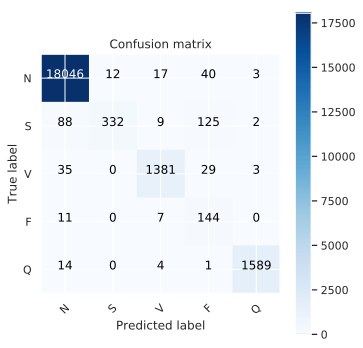

In [164]:
import itertools
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(testy.argmax(axis=1), y_pred.argmax(axis=1))
#np.set_printoptions(precision=0)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5, 5))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],
                      title='Confusion matrix')
plt.show()

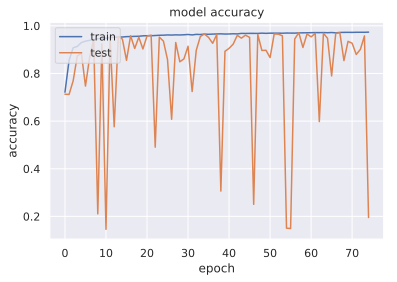

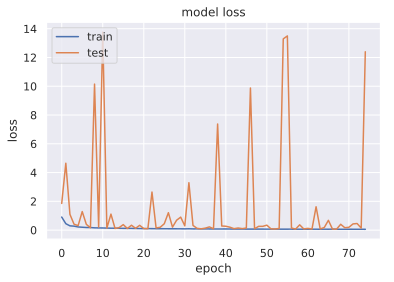

In [124]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## The last Step: Using all the training data and fitting more epochs

In [183]:
#K.set_value(model.optimizer.lr, 1e-3)
history = model.fit(X, y, validation_data=(testX,testy),epochs=150,batch_size=batch_size*2,class_weight='auto',callbacks=[checkpointer])

Train on 90118 samples, validate on 21892 samples
Epoch 1/150
90118/90118 [==============================] - 14s 153us/step - loss: 0.8596 - acc: 0.7905 - f1: 0.7118 - val_loss: 0.8075 - val_acc: 0.8276 - val_f1: 0.8276

Epoch 00001: val_f1 improved from -inf to 0.82761, saving model to /tmp/weights-aug.hdf5
Epoch 2/150
90118/90118 [==============================] - 10s 109us/step - loss: 0.4646 - acc: 0.8600 - f1: 0.8598 - val_loss: 2.4010 - val_acc: 0.8277 - val_f1: 0.8277

Epoch 00002: val_f1 improved from 0.82761 to 0.82765, saving model to /tmp/weights-aug.hdf5
Epoch 3/150
90118/90118 [==============================] - 10s 109us/step - loss: 0.2477 - acc: 0.9294 - f1: 0.9276 - val_loss: 2.5243 - val_acc: 0.8276 - val_f1: 0.8276

Epoch 00003: val_f1 did not improve from 0.82765
Epoch 4/150
90118/90118 [==============================] - 10s 110us/step - loss: 0.2516 - acc: 0.9268 - f1: 0.9260 - val_loss: 0.1933 - val_acc: 0.9439 - val_f1: 0.9410

Epoch 00004: val_f1 improved from 0.

90118/90118 [==============================] - 10s 109us/step - loss: 0.0464 - acc: 0.9855 - f1: 0.9854 - val_loss: 1.3101 - val_acc: 0.8702 - val_f1: 0.8701

Epoch 00036: val_f1 did not improve from 0.98247
Epoch 37/150
90118/90118 [==============================] - 10s 110us/step - loss: 0.0453 - acc: 0.9855 - f1: 0.9856 - val_loss: 2.4929 - val_acc: 0.8295 - val_f1: 0.8295

Epoch 00037: val_f1 did not improve from 0.98247
Epoch 38/150
90118/90118 [==============================] - 10s 110us/step - loss: 0.0774 - acc: 0.9773 - f1: 0.9774 - val_loss: 0.0987 - val_acc: 0.9727 - val_f1: 0.9729

Epoch 00038: val_f1 did not improve from 0.98247
Epoch 39/150
90118/90118 [==============================] - 10s 109us/step - loss: 0.0650 - acc: 0.9802 - f1: 0.9802 - val_loss: 0.7899 - val_acc: 0.7162 - val_f1: 0.7155

Epoch 00039: val_f1 did not improve from 0.98247
Epoch 40/150
90118/90118 [==============================] - 10s 109us/step - loss: 0.0752 - acc: 0.9767 - f1: 0.9768 - val_loss: 


Epoch 00072: val_f1 did not improve from 0.98561
Epoch 73/150
90118/90118 [==============================] - 10s 109us/step - loss: 0.0995 - acc: 0.9706 - f1: 0.9705 - val_loss: 0.1310 - val_acc: 0.9630 - val_f1: 0.9632

Epoch 00073: val_f1 did not improve from 0.98561
Epoch 74/150
90118/90118 [==============================] - 10s 109us/step - loss: 0.0545 - acc: 0.9829 - f1: 0.9829 - val_loss: 2.7446 - val_acc: 0.8276 - val_f1: 0.8276

Epoch 00074: val_f1 did not improve from 0.98561
Epoch 75/150
90118/90118 [==============================] - 10s 109us/step - loss: 0.0561 - acc: 0.9821 - f1: 0.9822 - val_loss: 1.9271 - val_acc: 0.8277 - val_f1: 0.8277

Epoch 00075: val_f1 did not improve from 0.98561
Epoch 76/150
90118/90118 [==============================] - 10s 109us/step - loss: 0.0384 - acc: 0.9875 - f1: 0.9875 - val_loss: 0.4261 - val_acc: 0.8986 - val_f1: 0.8982

Epoch 00076: val_f1 did not improve from 0.98561
Epoch 77/150
90118/90118 [==============================] - 10s 10

90118/90118 [==============================] - 10s 109us/step - loss: 0.0182 - acc: 0.9935 - f1: 0.9936 - val_loss: 0.0737 - val_acc: 0.9834 - val_f1: 0.9835

Epoch 00108: val_f1 did not improve from 0.98760
Epoch 109/150
90118/90118 [==============================] - 10s 109us/step - loss: 0.0175 - acc: 0.9937 - f1: 0.9937 - val_loss: 0.0693 - val_acc: 0.9867 - val_f1: 0.9866

Epoch 00109: val_f1 did not improve from 0.98760
Epoch 110/150
90118/90118 [==============================] - 10s 109us/step - loss: 0.0185 - acc: 0.9934 - f1: 0.9935 - val_loss: 0.0937 - val_acc: 0.9828 - val_f1: 0.9828

Epoch 00110: val_f1 did not improve from 0.98760
Epoch 111/150
90118/90118 [==============================] - 10s 109us/step - loss: 0.0174 - acc: 0.9941 - f1: 0.9940 - val_loss: 0.0863 - val_acc: 0.9824 - val_f1: 0.9826

Epoch 00111: val_f1 did not improve from 0.98760
Epoch 112/150
90118/90118 [==============================] - 10s 109us/step - loss: 0.0179 - acc: 0.9935 - f1: 0.9936 - val_lo


Epoch 00144: val_f1 did not improve from 0.98773
Epoch 145/150
90118/90118 [==============================] - 10s 110us/step - loss: 0.0130 - acc: 0.9954 - f1: 0.9954 - val_loss: 0.0824 - val_acc: 0.9828 - val_f1: 0.9831

Epoch 00145: val_f1 did not improve from 0.98773
Epoch 146/150
90118/90118 [==============================] - 10s 109us/step - loss: 0.0126 - acc: 0.9955 - f1: 0.9955 - val_loss: 0.0716 - val_acc: 0.9871 - val_f1: 0.9872

Epoch 00146: val_f1 did not improve from 0.98773
Epoch 147/150
90118/90118 [==============================] - 10s 108us/step - loss: 0.0121 - acc: 0.9959 - f1: 0.9959 - val_loss: 0.0923 - val_acc: 0.9842 - val_f1: 0.9842

Epoch 00147: val_f1 did not improve from 0.98773
Epoch 148/150
90118/90118 [==============================] - 10s 109us/step - loss: 0.0124 - acc: 0.9957 - f1: 0.9957 - val_loss: 0.0852 - val_acc: 0.9865 - val_f1: 0.9865

Epoch 00148: val_f1 did not improve from 0.98773
Epoch 149/150
90118/90118 [==============================] - 1

In [184]:
K.set_value(model.optimizer.lr, 1e-5)
history = model.fit(X, y, validation_data=(testX,testy),epochs=30,batch_size=batch_size*2,class_weight='auto',callbacks=[checkpointer])

Train on 90118 samples, validate on 21892 samples
Epoch 1/30
90118/90118 [==============================] - 10s 111us/step - loss: 0.0133 - acc: 0.9953 - f1: 0.9953 - val_loss: 0.0784 - val_acc: 0.9872 - val_f1: 0.9873

Epoch 00001: val_f1 did not improve from 0.98773
Epoch 2/30
90118/90118 [==============================] - 10s 109us/step - loss: 0.0122 - acc: 0.9957 - f1: 0.9957 - val_loss: 0.0758 - val_acc: 0.9877 - val_f1: 0.9878

Epoch 00002: val_f1 improved from 0.98773 to 0.98778, saving model to /tmp/weights-aug.hdf5
Epoch 3/30
90118/90118 [==============================] - 10s 110us/step - loss: 0.0118 - acc: 0.9959 - f1: 0.9959 - val_loss: 0.0744 - val_acc: 0.9879 - val_f1: 0.9879

Epoch 00003: val_f1 improved from 0.98778 to 0.98794, saving model to /tmp/weights-aug.hdf5
Epoch 4/30
90118/90118 [==============================] - 10s 110us/step - loss: 0.0107 - acc: 0.9961 - f1: 0.9961 - val_loss: 0.0734 - val_acc: 0.9882 - val_f1: 0.9883

Epoch 00004: val_f1 improved from 0.9

In [185]:
K.set_value(model.optimizer.lr, 1e-6)
history = model.fit(X, y, validation_data=(testX,testy),epochs=30,batch_size=batch_size*2,class_weight='auto',callbacks=[checkpointer])

Train on 90118 samples, validate on 21892 samples
Epoch 1/30
90118/90118 [==============================] - 10s 109us/step - loss: 0.0098 - acc: 0.9963 - f1: 0.9964 - val_loss: 0.0739 - val_acc: 0.9880 - val_f1: 0.9881

Epoch 00001: val_f1 did not improve from 0.98830
Epoch 2/30
90118/90118 [==============================] - 10s 109us/step - loss: 0.0098 - acc: 0.9964 - f1: 0.9964 - val_loss: 0.0740 - val_acc: 0.9880 - val_f1: 0.9881

Epoch 00002: val_f1 did not improve from 0.98830
Epoch 3/30
90118/90118 [==============================] - 10s 108us/step - loss: 0.0095 - acc: 0.9966 - f1: 0.9966 - val_loss: 0.0740 - val_acc: 0.9880 - val_f1: 0.9881

Epoch 00003: val_f1 did not improve from 0.98830
Epoch 4/30
90118/90118 [==============================] - 10s 109us/step - loss: 0.0097 - acc: 0.9965 - f1: 0.9965 - val_loss: 0.0741 - val_acc: 0.9880 - val_f1: 0.9881

Epoch 00004: val_f1 did not improve from 0.98830
Epoch 5/30
90118/90118 [==============================] - 10s 109us/step -

In [186]:
model.load_weights('/tmp/weights-aug.hdf5')
print("Evaluation: ")
mse, acc, F1 = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)
print('F1:', F1)

Evaluation: 
21892/21892 [==============================] - 2s 113us/step
mean_squared_error : 0.07256314557135643
accuracy: 0.9881691942262013
F1: 0.9883011446429545


In [187]:
model.save("0.9883.hdf5")

Confusion matrix, without normalization


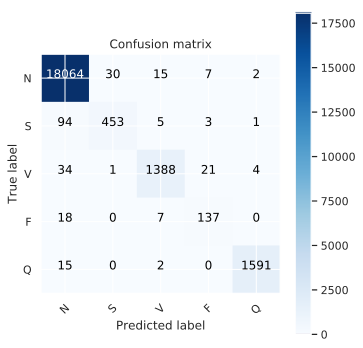

In [188]:
y_pred = model.predict(testX, batch_size=1000)
# Compute confusion matrix
cnf_matrix = confusion_matrix(testy.argmax(axis=1), y_pred.argmax(axis=1))
#np.set_printoptions(precision=0)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5, 5))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],
                      title='Confusion matrix')
plt.show()